In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

traffic_df = pd.read_csv('traffic_sao_paulo.csv', sep=";")
traffic_df['Slowness in traffic (%)'] = traffic_df['Slowness in traffic (%)'].str.replace(',', '.').astype('float')
traffic_df.rename(columns={'Slowness in traffic (%)': 'Slowness'}, inplace=True)

time_slots = []
start_time = 7 * 60

for i in range(27):
    hour = start_time + i * 30
    hours = hour // 60
    minutes = hour % 60
    time_slots.append(f"{hours:02d}:{minutes:02d}")

traffic_df["Time"] = time_slots * 5

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
traffic_per_day = {}

for i, day in zip(range(0, 135, 27), days):
    each_day_traffic_df = traffic_df.iloc[i: i + 27]
    traffic_per_day[day] = each_day_traffic_df


def plot_graph(day):
    day = day.lower()

    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))

    day_capitalized = day.capitalize()

    if day == "all":
        for day_name, data in traffic_per_day.items():
            plt.plot(data["Time"], data["Slowness"], label=day_name)

        plt.title("Traffic Analysis for All Days", color='white')
        plt.xlabel("Hour of the day", color='white')
        plt.ylabel("Slowness in Traffic %age", color='white')
        plt.legend()
    else:
        if day_capitalized in traffic_per_day:
            plt.plot(traffic_per_day[day_capitalized]["Time"], traffic_per_day[day_capitalized]["Slowness"],
                     label=day_capitalized, color='yellow')
            plt.title(f"{day_capitalized} Analysis", color='white')
            plt.xlabel("Hour of the day", color='white')
            plt.ylabel("Slowness in Traffic %age", color='white')
        else:
            print("Invalid day name. Please try again.")
            return None

    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')
    plt.legend()

    plt.show()

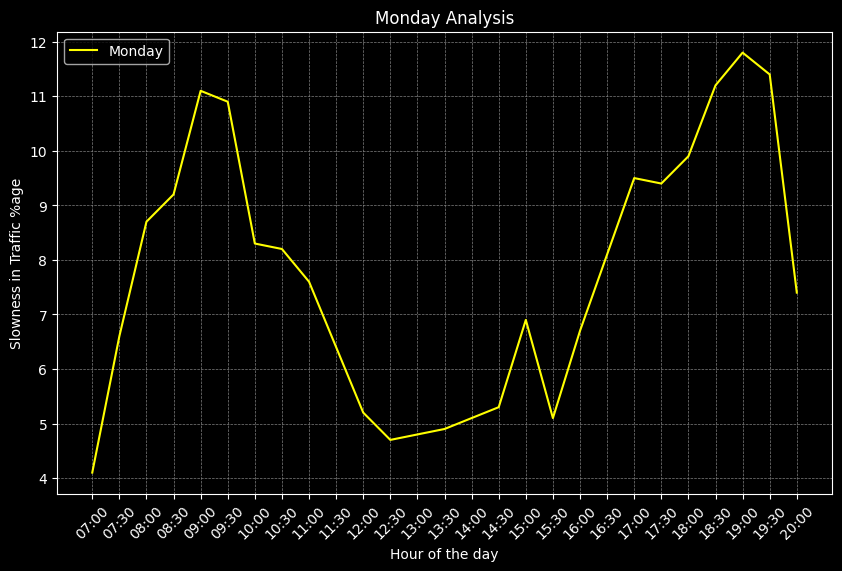

In [3]:
plot_graph('Monday')

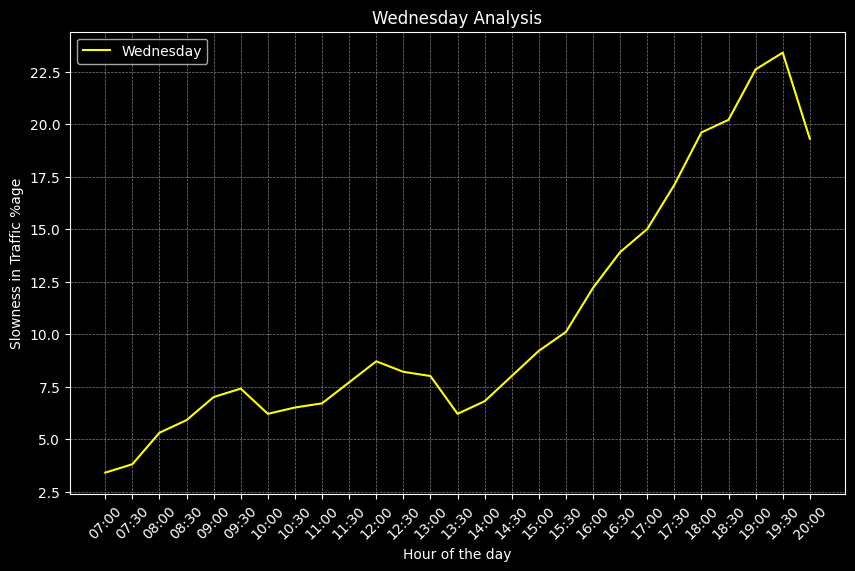

In [4]:
plot_graph('wednesday')

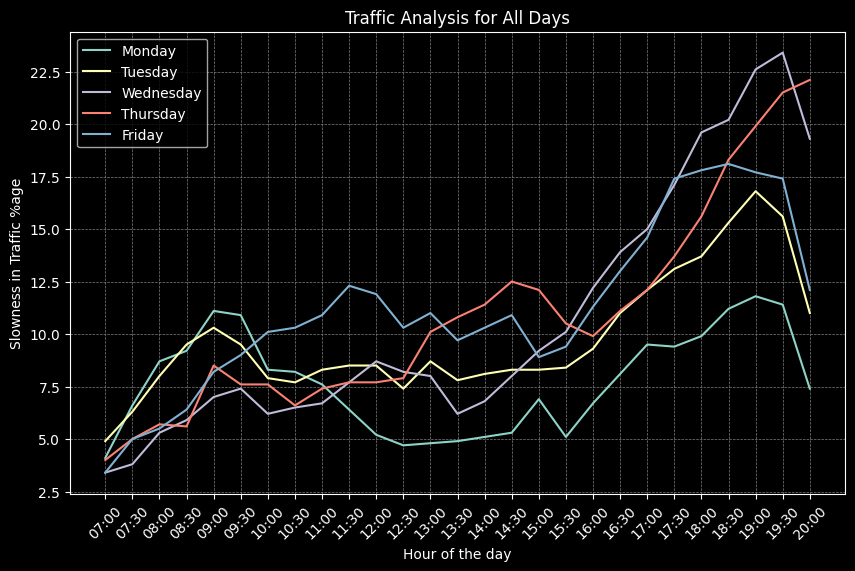

In [5]:
plot_graph('all')

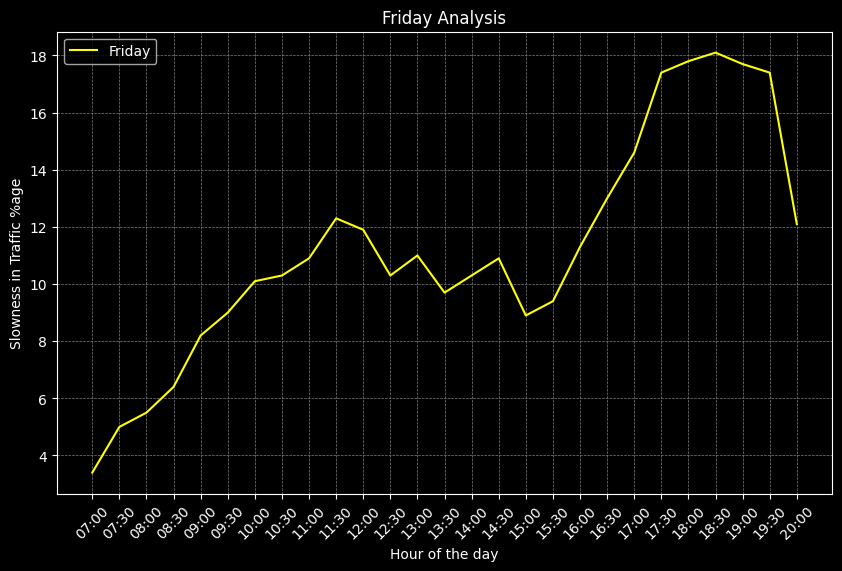

In [6]:
plot_graph('FRIDAY')